# 예제 3.5번(임의 탐색)

<img src="img/문제상황.png" style="width: 500px;" align="left"/>


왼쪽과 같은 문제상황.    
5X5 Grid안에서    
Action은 상,하,좌,우가 가능함 
       
이때 5X5 State Value Table을 오른쪽 그림과 같이 만들어 내는것이 문제 

여기서는 경험적으로 Value를 탐색하는게 아니라, 임의로 i,j를 하나씩 옮겨가며 탐색함.     
이건 실제 Agent랑은 다를거 같아서 다시풀음.
     
-> 실제 Agent는 임의의 State가아니라 경험에의한 학습이라고 책에 언급되어있기 때문에 

reference : https://realdiganta.medium.com/coding-the-gridworld-example-from-deepminds-reinforcement-learning-course-in-python-17d74335fcbc



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
grid = np.zeros((5,5))
grid

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [19]:
discounting = 0.9 # Discounting Factor


for epoch in range(1000):
    for i in range(5):
        for j in range(5):
            up = grid[i][j+1] if j < 4 else 0 
            down = grid[i][j-1] if j > 0  else 0
            left = grid[i-1][j] if i > 0 else 0
            right = grid[i+1][j] if i < 4 else 0
            
            all_dirs = [up, down, left, right]
            
            value=0
            if i==1 and j==4:
                value = 10 + discounting*grid[1][0]
            elif i==3 and j==4:
                value = 5 + discounting*grid[3][2]
            else:
                for direc in all_dirs:
                    if direc !=0:
                        value += 0.25 * (0 + discounting*direc)
                    else:
                        value += 0.25 *(-1 + discounting*direc)
            
            # print(value)
            grid[i][j] = value

[[ 1.8  9.5  3.6  5.5  0.8]
 [ 0.8  3.   2.1  1.9  0.3]
 [ 0.   0.9  0.8  0.6 -0.2]
 [-0.4  0.   0.1 -0.1 -0.5]
 [-0.7 -0.5 -0.5 -0.5 -0.7]]


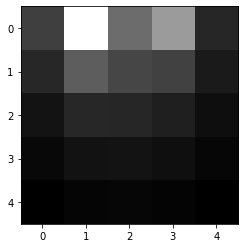

In [20]:
res = []
for i in range(5):
    res.append(grid[:,-(i-4)])
    
print(np.round(res,1))
plt.imshow(np.array(res),cmap=cm.gray)


값은 조금 다르나, 
정상적인 Value분포를 보이는것을 확인

# Other Reference

In [97]:
grid = np.zeros((5,5))
grid

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [98]:
Y = .90  #discount value
for num in range(1000): #number of times we will go through the whole grid
  for i in range(5):      #all the rows
    for j in range(5):    #all the columns
      
      up_grid = grid[i-1][j] if i > 0 else 0   #if going up takes us out of the grid then its value be 0
      down_grid = grid[i+1][j] if i < 4 else 0  #if going down takes us out of the grid then its value be 0
      left_grid = grid[i][j-1] if j > 0 else 0  #if going left takes us out of the grid then its value be 0
      right_grid = grid[i][j+1] if j < 4 else 0  #if going right takes us out of the grid then its value be 0

      all_dirs = [up_grid, down_grid, left_grid, right_grid]     

      value=0  
      if i==0 and j==1: # the position of A
        value = 10 + Y*grid[4][1]
      elif i==0 and j==3: # the position of B
        value = 5 + Y*grid[2][3]
      else:
        for direc in all_dirs:
          if direc != 0: 
            value += .25 * (0 + Y*direc)  #if we don't go out of the grid
          else:
            value += .25 * (-1 + Y*grid[i][j]) #if we go out of the grid
        
      grid[i][j] = value   

In [99]:
np.round(grid, 1)

array([[ 3.3,  8.8,  4.4,  5.3,  1.5],
       [ 1.5,  3. ,  2.3,  1.9,  0.5],
       [ 0.1,  0.7,  0.7,  0.4, -0.4],
       [-1. , -0.4, -0.4, -0.6, -1.2],
       [-1.9, -1.3, -1.2, -1.4, -2. ]])

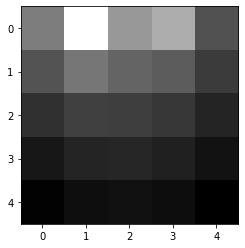

In [100]:
plt.imshow(grid,cmap=cm.gray)

인터넷에서 누가 폴어놓은건데,     
i,j 탐색하는 순서만 달라진건데 책에서랑 답이 똑같음     
      

      -> 경향성만 맞으면 상관없는듯